In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

In [2]:
## Initial electric field
def E(x, y, z, q=1):
    factor = 9e9
    r = np.sqrt(x**2 + y**2 + z**2)
    ex = q*factor*x/r**3
    ey = q*factor*y/r**3
    ez = q*factor*z/r**3
    return ex, ey, ez

def B(x, y, z, q=1):
    return np.zeros_like(x), np.zeros_like(y), np.zeros_like(z)

## Fields in the fixed frame

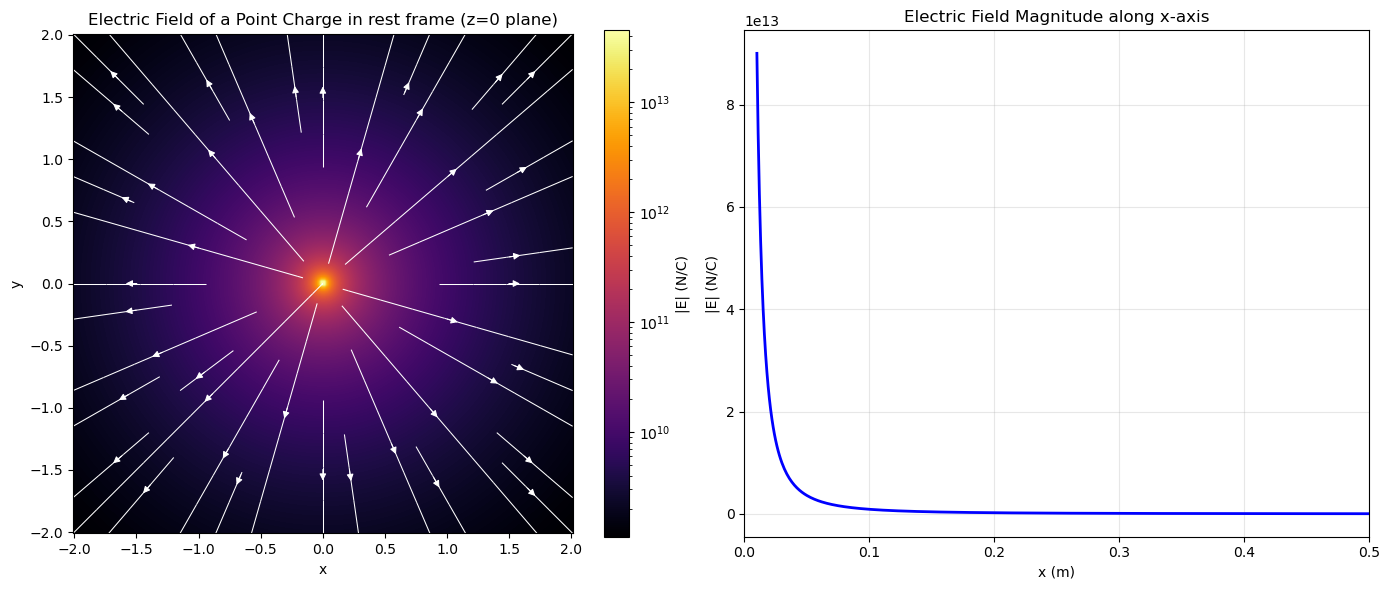

In [3]:
## Position arrays
x = np.arange(-2.01, 2.03, 0.02)
y = np.copy(x)
z = np.copy(x)

## Making 3d meshgrid
Xt, Yt, Zt = np.meshgrid(x, y, z)

## Make 2d meshgrids
z_index = np.argmin(np.abs(z - 0))
X1 = Xt[:, :, z_index]
Y1 = Yt[:, :, z_index]

## Compute the fields in xy plane
Ex, Ey, Ez = E(X1, Y1, z=0)
E_mag = np.sqrt(Ex**2 + Ey**2)

## Plot the fields in the rest frame of the charge
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
im = plt.imshow(E_mag, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='inferno', interpolation='bilinear', norm=LogNorm())
plt.streamplot(X1, Y1, Ex, Ey, color='white', linewidth=0.75, density=0.5, arrowsize=1 )
plt.colorbar(im, label='|E| (N/C)')
plt.title('Electric Field of a Point Charge in rest frame (z=0 plane)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

plt.subplot(1,2,2)
xp = np.arange(0.01, 0.5, 0.001)
Ex_1d, Ey_1d, Ez_1d = E(xp, 0, 0)
E_mag_1d = np.sqrt(Ex_1d**2 + Ey_1d**2 + Ez_1d**2)
plt.plot(xp, E_mag_1d, 'b-', linewidth=2)
plt.xlabel('x (m)')
plt.ylabel('|E| (N/C)')
plt.title('Electric Field Magnitude along x-axis')
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.5)

plt.tight_layout()
plt.show()

## Fields in the moving frame

In [4]:
def fields_trans(x, y, z, beta, q=1):
    gamma = 1 / np.sqrt(1 - beta**2)
    ex, ey, ez = E(x*gamma, y, z, q)
    bx, by, bz = B(x*gamma, y, z, q)

    Ex = ex
    Ey = gamma * (ey + beta * bz)
    Ez = gamma * (ez - beta * by)

    Bx = bx
    By = gamma * (by - beta * ez)
    Bz = gamma * (bz + beta * ey)

    return Ex, Ey, Ez, Bx, By, Bz


In [5]:
def moving_plots(beta):
    ## helper for safe lognorms
    def safe_norm(data):
        data = np.array(data)
        positive = data[data > 0]
        if positive.size > 0:
            return LogNorm(vmin=np.nanmin(positive), vmax=np.nanmax(data))
        else:
            # fallback to linear normalization
            return Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data))

    ## Position arrays
    x = np.arange(-2.01, 2.03, 0.02)
    y = np.copy(x)
    z = np.copy(x)

    ## Making 3d meshgrid
    Xt, Yt, Zt = np.meshgrid(x, y, z)

    ## 2D planes
    z_index = np.argmin(np.abs(z - 0))
    X1 = Xt[:, :, z_index]
    Y1 = Yt[:, :, z_index]

    ## xy-plane (z=0)
    Ex1, Ey1, _, Bx1, By1, _ = fields_trans(X1, Y1, 0, beta)
    E1_mag = np.sqrt(Ex1**2 + Ey1**2)
    B1_mag = np.sqrt(Bx1**2 + By1**2)

    ## yz-plane (x=0)
    Y2, Z2 = np.meshgrid(y, z)
    _, Ey2, Ez2, _, By2, Bz2 = fields_trans(0, Y2, Z2, beta)
    E2_mag = np.sqrt(Ey2**2 + Ez2**2)
    B2_mag = np.sqrt(By2**2 + Bz2**2)

    ## xz-plane (y=0)
    X3, Z3 = np.meshgrid(x, z)
    Ex3, _, Ez3, Bx3, _, Bz3 = fields_trans(X3, 0, Z3, beta)
    E3_mag = np.sqrt(Ex3**2 + Ez3**2)
    B3_mag = np.sqrt(Bx3**2 + Bz3**2)

    ## Plotting
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # --- E-field plots ---
    im1 = axes[0, 0].imshow(E1_mag, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='CMRmap', norm=safe_norm(E1_mag))
    axes[0, 0].streamplot(X1, Y1, Ex1, Ey1, color='white', linewidth=0.5, density=0.75)
    axes[0, 0].set_title('E-field: Ex–Ey (z=0)')
    axes[0, 0].set_xlabel('x')
    axes[0, 0].set_ylabel('y')
    plt.colorbar(im1, ax=axes[0, 0], label='|E|')

    im2 = axes[0, 1].imshow(E2_mag, extent=[y.min(), y.max(), z.min(), z.max()], origin='lower', cmap='CMRmap', norm=safe_norm(E2_mag))
    axes[0, 1].streamplot(Y2, Z2, Ey2, Ez2, color='white', linewidth=0.5, density=0.75)
    axes[0, 1].set_title('E-field: Ey–Ez (x=0)')
    axes[0, 1].set_xlabel('y')
    axes[0, 1].set_ylabel('z')
    plt.colorbar(im2, ax=axes[0, 1], label='|E|')

    im3 = axes[0, 2].imshow(E3_mag, extent=[x.min(), x.max(), z.min(), z.max()], origin='lower', cmap='CMRmap', norm=safe_norm(E3_mag))
    axes[0, 2].streamplot(X3, Z3, Ex3, Ez3, color='white', linewidth=0.5, density=0.75)
    axes[0, 2].set_title('E-field: Ex–Ez (y=0)')
    axes[0, 2].set_xlabel('x')
    axes[0, 2].set_ylabel('z')
    plt.colorbar(im3, ax=axes[0, 2], label='|E|')

    # --- B-field plots ---
    im4 = axes[1, 0].imshow(B1_mag, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='bwr', norm=safe_norm(B1_mag))
    axes[1, 0].streamplot(X1, Y1, Bx1, By1, color='white', linewidth=0.5, density=0.5)
    axes[1, 0].set_title('B-field: Bx–By (z=0)')
    axes[1, 0].set_xlabel('x')
    axes[1, 0].set_ylabel('y')
    plt.colorbar(im4, ax=axes[1, 0], label='|B|')

    im5 = axes[1, 1].imshow(B2_mag, extent=[y.min(), y.max(), z.min(), z.max()], origin='lower', cmap='CMRmap', norm=safe_norm(B2_mag))
    axes[1, 1].streamplot(Y2, Z2, By2, Bz2, color='white', linewidth=0.5, density=0.5)
    axes[1, 1].set_title('B-field: By–Bz (x=0)')
    axes[1, 1].set_xlabel('y')
    axes[1, 1].set_ylabel('z')
    plt.colorbar(im5, ax=axes[1, 1], label='|B|')

    im6 = axes[1, 2].imshow(B3_mag, extent=[x.min(), x.max(), z.min(), z.max()], origin='lower', cmap='bwr', norm=safe_norm(B3_mag))
    axes[1, 2].streamplot(X3, Z3, Bx3, Bz3, color='white', linewidth=0.5, density=0.5)
    axes[1, 2].set_title('B-field: Bx–Bz (y=0)')
    axes[1, 2].set_xlabel('x')
    axes[1, 2].set_ylabel('z')
    plt.colorbar(im6, ax=axes[1, 2], label='|B|')

    plt.suptitle(f'Electromagnetic Field of a Moving Charge (q = 1c) (β = {beta})', fontsize=16)
    plt.tight_layout()
    plt.show()


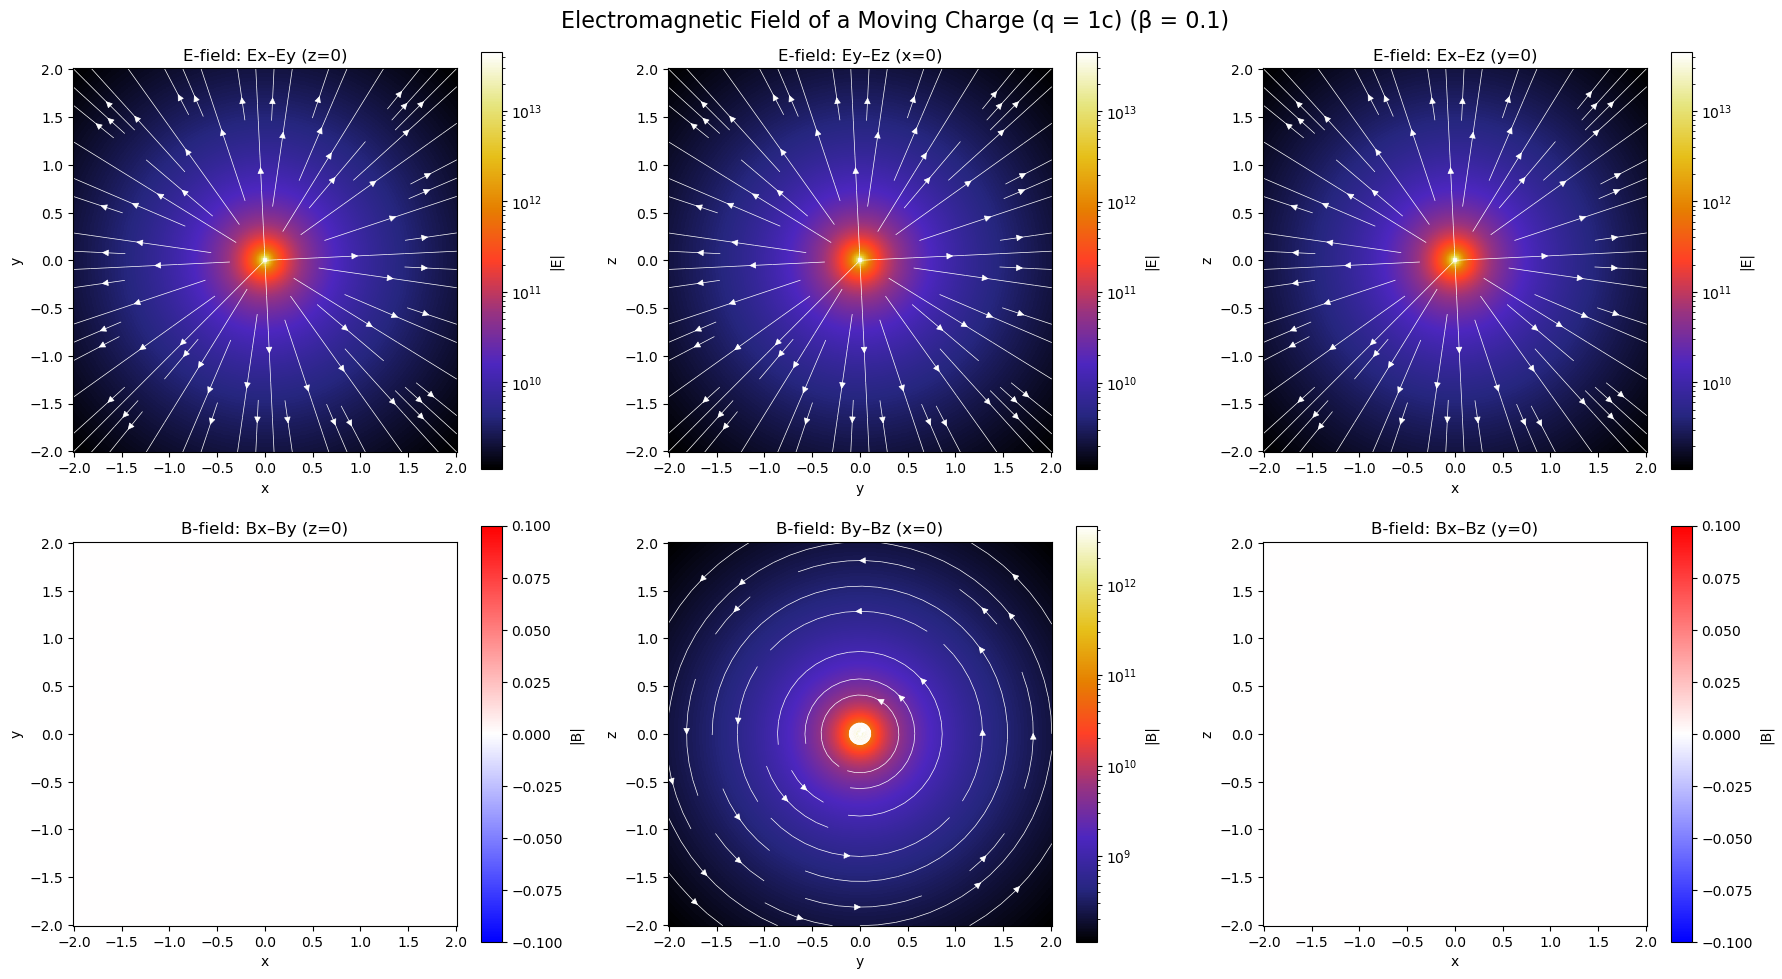

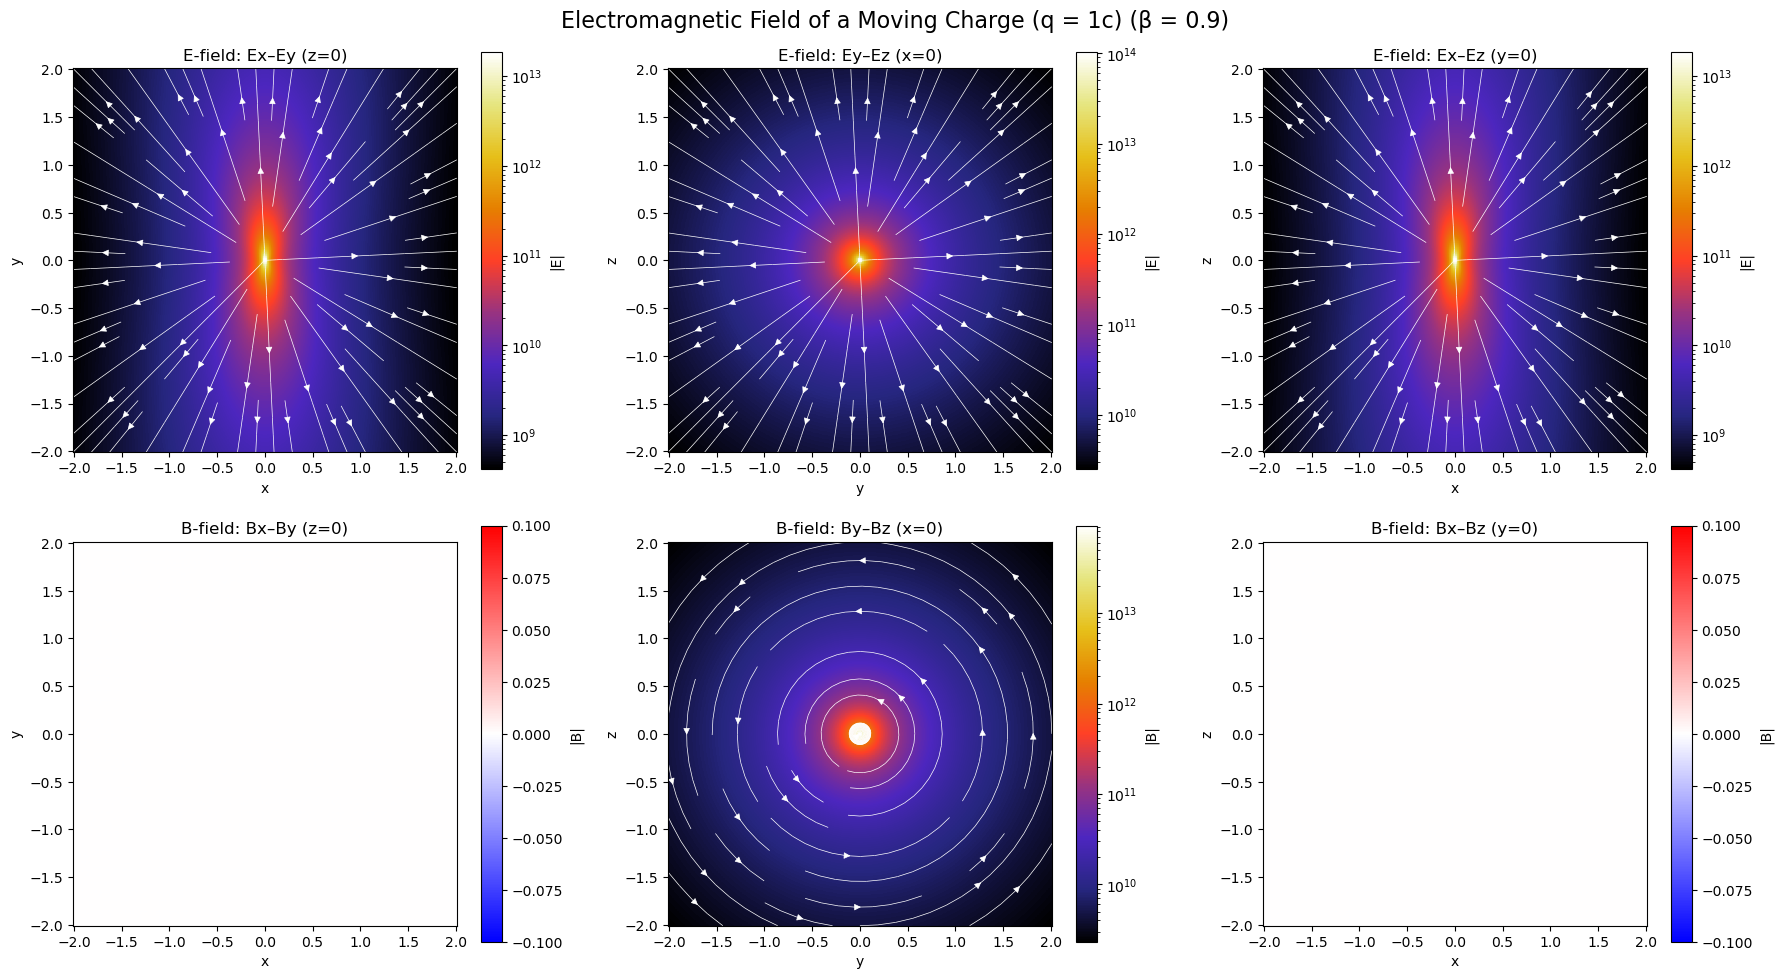

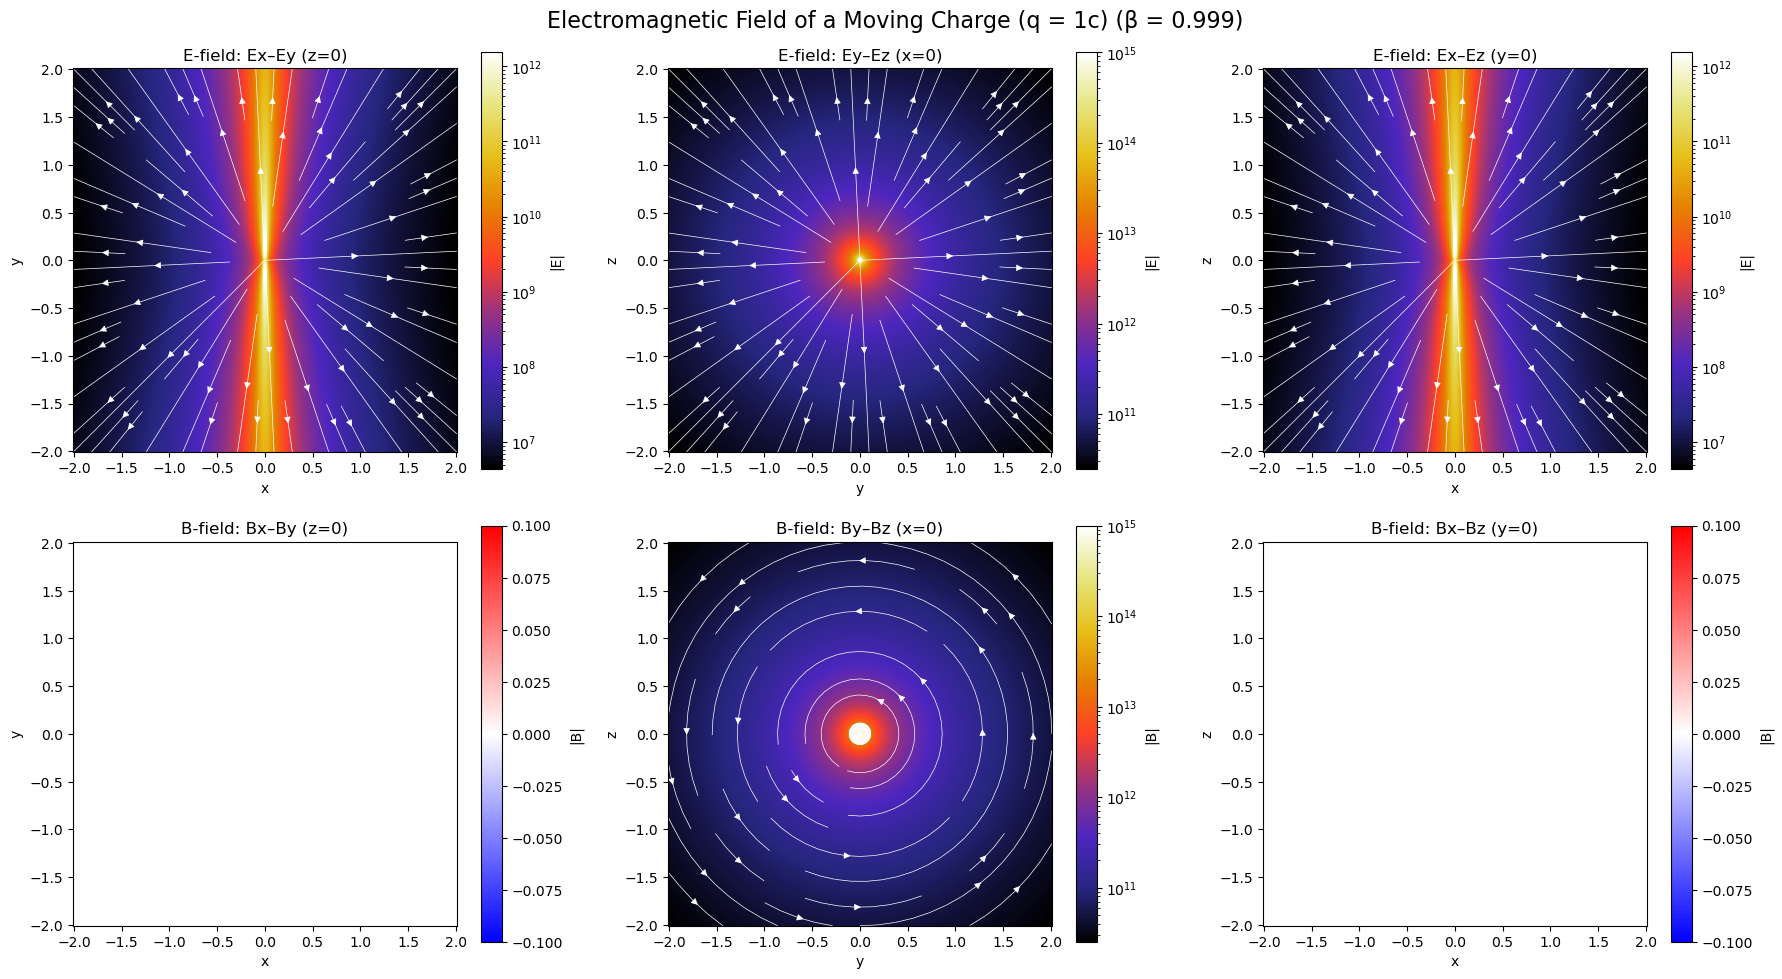

In [6]:
## Plot for beta 0.1
moving_plots(beta=0.1)

## Plot for beta 0.9
moving_plots(beta=0.9)

## Plot for beta 0.999
moving_plots(beta=0.999)
